# File and libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_0_2024_agg_time_pre_proc.csv'

file_tag = "Google Merch Store 2024-2025"


# DSLabs functions

In [12]:
%run "scripts/dslabs_functions.py"


# Data functions

In [13]:
%run "scripts/data_functions.py"


ImportError: cannot import name 'PRED_PAST_COLOR' from 'dslabs_functions' (C:\Data\Coding\Python\ist_dash_2024_rec\time_series_forecasting\notebooks\dataset_3\scripts\dslabs_functions.py)

# Load

In [14]:
test_data=True
# test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)


 
target='Sessions'
series: Series = data[target]

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 67 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sessions                                  427 non-null    int64  
 1   Bounce rate                               427 non-null    float64
 2   Seven-day active users                    427 non-null    int64  
 3   28-day active users                       427 non-null    int64  
 4   New users                                 427 non-null    int64  
 5   Scrolled users                            330 non-null    float64
 6   Engaged sessions                          427 non-null    int64  
 7   Views                                     427 non-null    int64  
 8   Event count                               427 non-null    int64  
 9   Events per session                        427 non-null    float64
 10  Item-list view even

# Missing Values Analysis

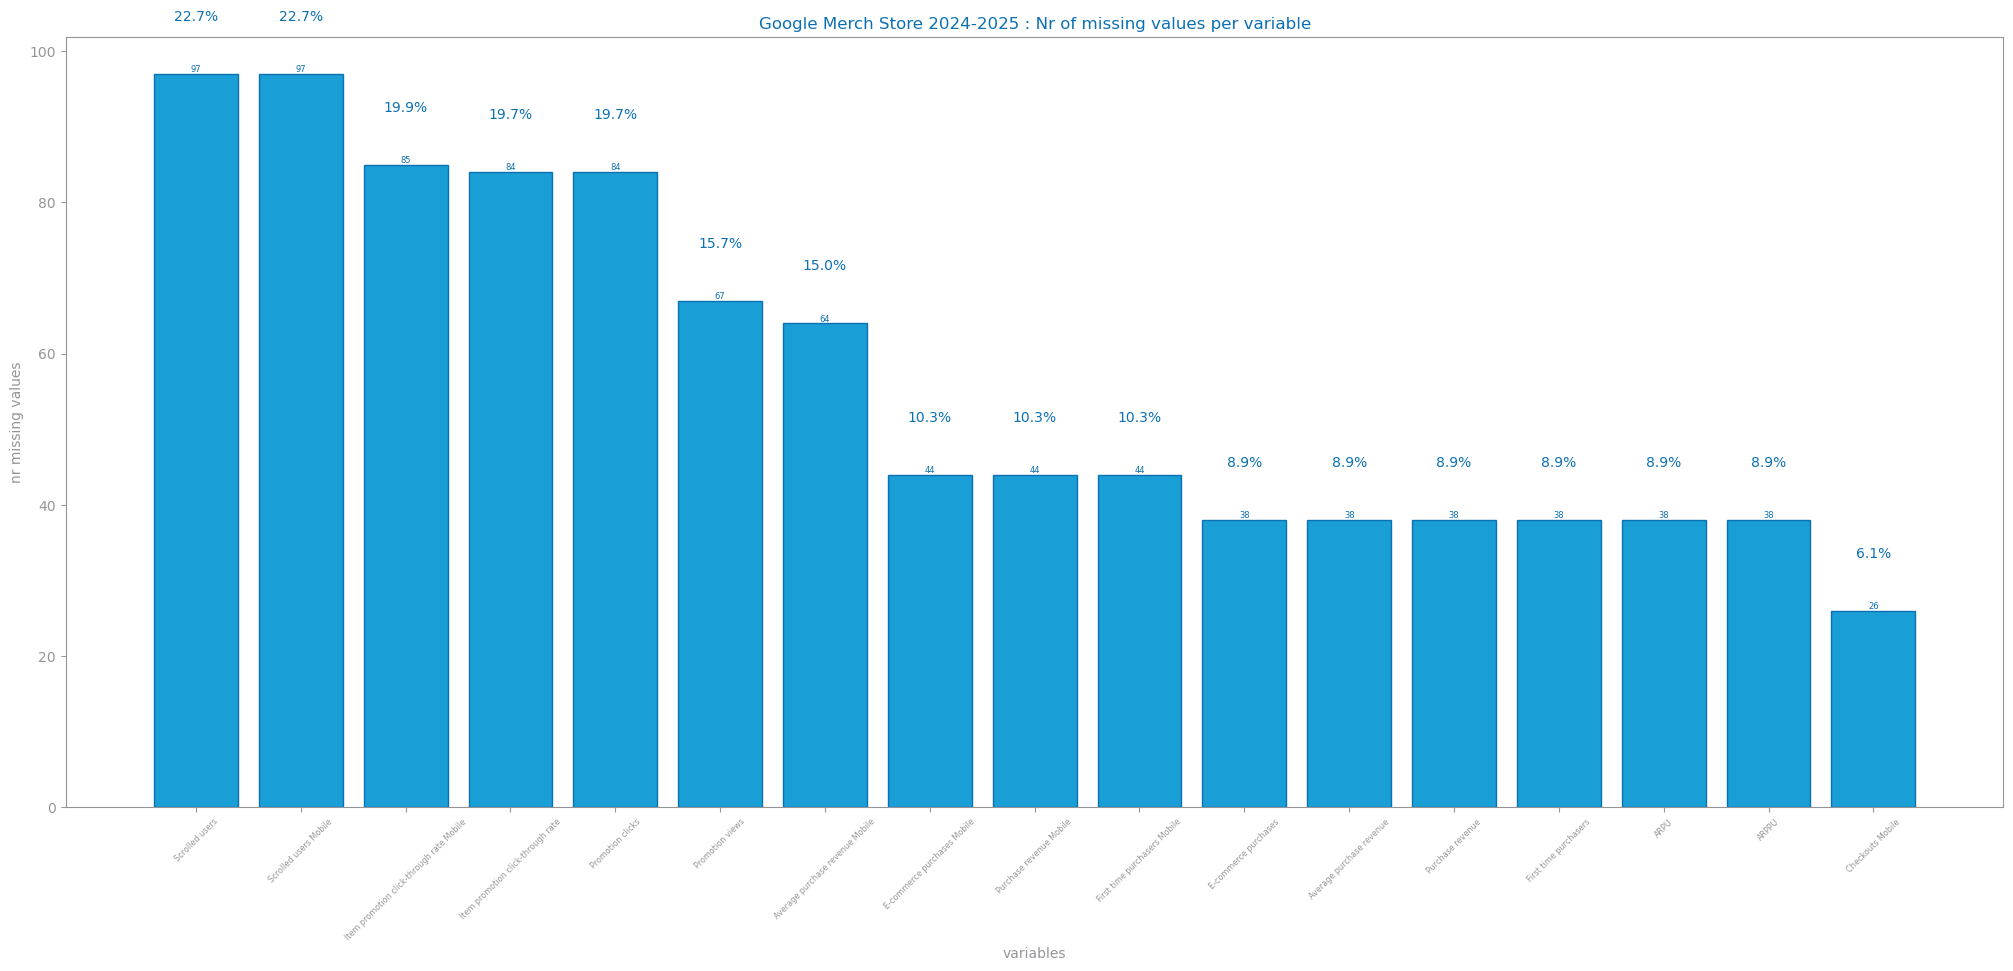

In [15]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(data)

for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

# MV 1 - Most Frequent Srategy

## MV1 strategy apply

In [16]:


# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    df_copy=apply_missing_values_frequent(df)

    return df_copy

data_1=apply_strategy_1(data)
data_1.describe()


,Sessions,Bounce rate,Seven-day active users,28-day active users,New users,Scrolled users,Engaged sessions,Views,Event count,Events per session,...,Sessions referral,season,commercial_season,week_of_month,day_of_week_nr,Sessions affiliate,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,...,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,2096.981265,0.477794,10567.112412,38404.140515,1208.053864,831.678788,1129.370023,7518.901639,29223.332553,13.742619,...,164.238876,0.698949,-0.470871,3.227166,3.000000,0.002342,0.285714,0.028103,0.018735,0.004684
std,1078.436107,0.100940,3632.601576,12293.299375,627.503784,567.157061,776.451498,6176.753658,23458.915577,3.952863,...,264.319534,1.652479,1.457896,1.308123,2.002346,0.048393,0.452284,0.165461,0.135748,0.068358
min,22.000000,0.165997,780.000000,780.000000,4.000000,213.000000,4.000000,20.000000,401.000000,4.343862,...,0.000000,-1.570796,-2.094395,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1463.000000,0.412334,8326.500000,30502.500000,876.500000,566.000000,662.500000,4267.000000,16799.000000,11.470473,...,36.000000,0.000000,-1.047198,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1984.000000,0.478213,10800.000000,40024.000000,1177.000000,831.678788,999.000000,6563.000000,25377.000000,14.038885,...,75.000000,0.000000,-1.047198,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2545.500000,0.545998,12269.500000,48328.000000,1442.000000,874.500000,1346.500000,9370.500000,36457.500000,16.004337,...,181.000000,1.570796,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,11239.000000,0.818182,20447.000000,60050.000000,7734.000000,6455.000000,8453.000000,94665.000000,353391.000000,34.000000,...,2663.000000,3.141593,3.141593,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## MV1 evaluate

In [17]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
train, test = series_train_test_split(data, trn_pct=0.90)

fr_mod = SimpleAvgRegressor()
fr_mod.fit(train)
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Simple Average")
savefig(f"images/{file_tag}_simpleAvg_eval.png")

ValueError: Input contains NaN.

# MV2 - drop null strategy


## MV2 strategy apply

In [9]:
def apply_strategy_2(df):

    df_copy=df.copy()

    drop_cols=['device_language','device_operating_system_version']
    
    df_copy=apply_missing_values_remove_cols_and_any_na_rows(df,drop_cols)

    return df_copy

data_2=apply_strategy_2(data)

## MV2 train/test split 

Labels=[0, 1]


<Axes: title={'center': 'Google Merch Shop | Data distribution per dataset'}>

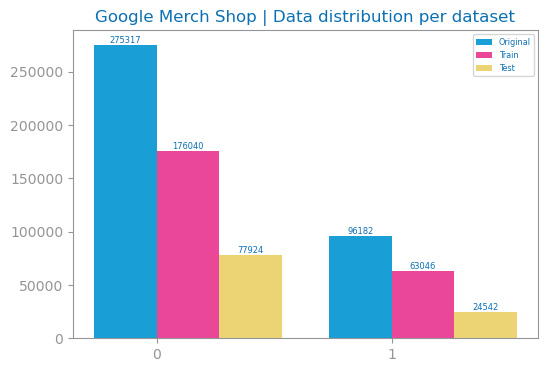

In [10]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


values["Train"] = [
    len(train_2[train_2[target] == 0]),
    len(train_2[train_2[target] == 1]),
]
values["Test"] = [
    len(test_2[test_2[target] == 0]),
    len(test_2[test_2[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title=f"{file_tag} | Data distribution per dataset")

## MV2 evaluate

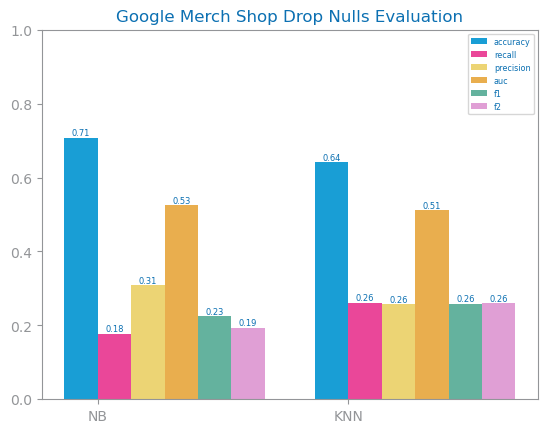

In [11]:

figure()
eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='returning_user', metric=target_metric)
plot_multibar_chart(
    ["NB", "KNN"], eval_2, title=f"{file_tag} Drop Nulls Evaluation", percentage=True
)
savefig(f"images/{file_tag}_mv2_evaluation.png")
show()

# Approach uplift comparison

## uplift df

In [12]:
algorithms = ['Naive Bayes', 'KNN']

# Create DataFrames for eval_1 and eval_2
df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

# Calculate uplift
df_uplift = df_eval_2 - df_eval_1



# Combine everything into one DataFrame (without misalignment issues)
comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



# Display the DataFrame
comparison_df

Approach 1                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.680188  0.235301  0.297728  0.528891  0.262859  0.245600   
KNN           0.639946  0.273734  0.264925  0.515405  0.269257  0.271925   

            Approach 2                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.707659  0.177247  0.308226  0.525979  0.225068  0.193710   
KNN           0.641842  0.261429  0.256753  0.511541  0.259070  0.260481   

               Uplift                                                    
             accuracy    recall precision       auc        f1        f2  
Naive Bayes  0.027471 -0.058053  0.010499 -0.002912 -0.037791 -0.051890  
KNN          0.001896 -0.012304 -0.008172 -0.003864 -0.010187 -0.011445

## t test

In [13]:

from scipy.stats import ttest_rel


# Perform paired t-tests for each metric
t_test_results = {'t_stat': [], 'p_value': []}
for metric in eval_1.keys():
    t_stat, p_value = ttest_rel(df_eval_1[metric], df_eval_2[metric])
    t_test_results['t_stat'].append(t_stat)
    t_test_results['p_value'].append(p_value)

# Create DataFrame for t-test results
df_ttest = pd.DataFrame(t_test_results, index=eval_1.keys())

# Convert t-test results to a DataFrame with MultiIndex and concatenate it
df_ttest_multi = pd.DataFrame({
    ('t_test', 't_stat'): df_ttest['t_stat'],
    ('t_test', 'p_value'): df_ttest['p_value']
})

df_ttest_multi

t_test          
             t_stat   p_value
accuracy  -1.148272  0.456131
recall     1.537904  0.367037
precision -0.124607  0.921079
auc        7.117972  0.088857
f1         1.738121  0.332370
f2         1.565953  0.361798

# Analysis

- Uplift between missing value input approaches is significant when it comes to recall (40% to 35% drop on mv2). every other metric does not show significant uplifts
- there is low difference in terms of data processing (with frequent approach taking about 2 mins more with a 20% of the original dataset sample)
- we will move forward with approach 1 for missing values due to slightly better results on recall and more records dimensionality


## UPDATE
- sample on 10% now
- focus on f2, recall and precision.

# save to csv

In [14]:
if test_data==False:
    
    data_copy=apply_strategy_1(data)
    
    data_copy.to_csv(f"data/df_merch_3_mv_input.csv", index=False)
    